# Funció de transferència

```{admonition} Pàgina en desenvolupament
Encara estem treballant en aquest document.   
Esperem oferir-vos properament el seu contingut.   
Disculpeu les molèsties.
```

A Enginyeria, una funció de transferència és una funció matemàtica que modela la sortida del sistema per a qualsevol entrada {cite}`Transfer_function`.

És una definició curta, però molt potent. Si coneixem la funció de transferència coneixem la resposta del sistema per a qualsevol entrada. On està la trampa? Es necessitem matemàtiques molt avançades per fer aquests càlculs. 

## La transformada de Laplace

La [transformada de Laplace](https://ca.wikipedia.org/wiki/Transformada_de_Laplace) es una transformada integral que converteix una función de variable real f(t) (típicament el temps) a una funció de variable complexa F(s):

$\huge F(s)=\int_{-\infty}^{\infty} e^{-st} f(t)\,dt$

Aquesta transformada integral té una sèrie de propietats que la fan molt útil en l'anàlisi de sistemes lineals. Un dels avantatges més significatius és el fet que la integració i derivació es converteixen en multiplicació i divisió. Això transforma les equacions diferencials i integrables en equacions polinòmiques, molt més fàcils de resoldre. També és important el fet que aquesta transformada converteix la convolució de funcions en una multiplicació. 

Justament el senyal de sortida d'un sistema Y(s) és la convolució de la resposta impulsiva del sistema o funció de transferència H(s) amb el senyal d'entrada X(s). Així, la nostra funció de transferència val:

$\Huge H(s) = \frac{Y(s)}{X(s)}$

![](img/Control/db27.png)

### Transformada de Fourier

Recordem que la nostra variable s és complexa: $s = \sigma + j\omega$

En el cas $\sigma=0$ la transformada de Laplace coincideix amb la [transformada de Fourier](https://ca.wikipedia.org/wiki/Transformada_de_Fourier), de variable real f:

$\huge F(f) = \int_{-\infty}^{\infty} f(x)\ e^{- 2\pi j f x}\,dx$

Aquesta transformada integral, molt utilitzada a Física, té un sentit més intuitiu: ens dona el guany per a cada freqüencia. Serveix per conèixer la resposta del sistema a l'estat estacionari. Però la resposta transitòria d'encendre i apagar el sistema o l'estudi de la seva estabilitat ens el dona la transformada de Laplace {cite}`Transfer_function`.

Veiem alguns exemples d'aplicació:

* Començarem per un exemple conegut, el programari *Audacity*. Tan l'eina Equalitzador gràfic com a filtre fan el mateix, el primer amb bandes de freqüència, el segon amb una corba contínua: modificar la resposta a cada freqüènci del sistema (en aquest cas modifica l'arxiu d'audio):

| Equalitzador gràfic | Filtre |
| :---: | :---: |
|![](img/Control/audacityEqGraf.png)|![](img/Control/audacityFiltre.png)|

* Quan un tècnic de so arriba a un escenari (posem el Palau Sant Jordi) per a un concert, necessita conèixer la resposta del recinte.Això ho pot fer de dues formes: generar diferents freqüències i mesurar com es reben, o be generar un pols curt i mesurar la resposta. En els dos casos tindrà suficient informació per ajustar el seu equalizador gràfic per reforçar les freqüències amb una absorció més gran i rebaixar les que ressonen en el recinte. Ara l'equip estarà preparat per donar en temps real el senyal del concert amb la màxima qualitat pels assistents.

![](img/Control/eqGrafPro.jpg)
  
* Estudiant la funció de transferència del terra (amb l'ajut d'una mica de dinamita i transductors a diferents llocs) s'ha pogut localitzar amb una precissió de cm l'ubicació de diferents runes soterrades a jaciment arqueològics.

* Quan et fan una audiometria l'objectiu és aconseguir una aproximació a la funció de transferència del teu oïde, especialment útil per ajustar els audífons si és el cas.







## Diagrames de Bode

Un diagrama de Bode és una gràfica on s'utilitzen escales logarítmiques en la representació de les corbes de resposta freqüencial d'un sistema. consta de dues gràfiques separades, una que correspon al guany i una altra que correspon amb la fase.

El guany es mesura en dB ([decibels](https://ca.wikipedia.org/wiki/Decibel)) i la fase en °. 

Un avantatge de treballar amb l'entorn Jupyter és deixar que Python faci la feina. Veiem un exemple.

El circuit següent és un filtre RC passa-baixos de 1r ordre:

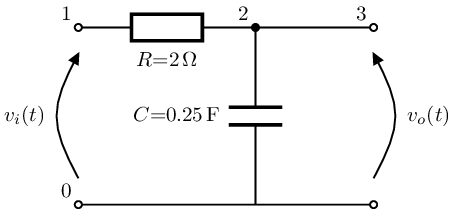

In [1]:
from lcapy import *
a = Circuit("""
P1 1 0; down=1.5, v_=v_i(t)
R 1 2 2; right=1.5
C 2 0_2 {1/4}; down
W 0 0_2; right
W 2 3; right
W 0_2 0_3; right
P2 3 0_3; down, v^=v_o(t)""")
a.draw(style="european",scale=0.5)

$v_i(t)$ és el voltatge d'entrada i $v_o(t)$ el de sortida. La funció de transferència en el domini de Laplace es pot calcular especificant els nodes:

In [2]:
H = a.transfer(1, 0, 3, 0)
H

  1  
─────
s    
─ + 1
2    

Ja tenim la funció de transferència $H(s)$. Anem a veure els seus diagrames de Bode:

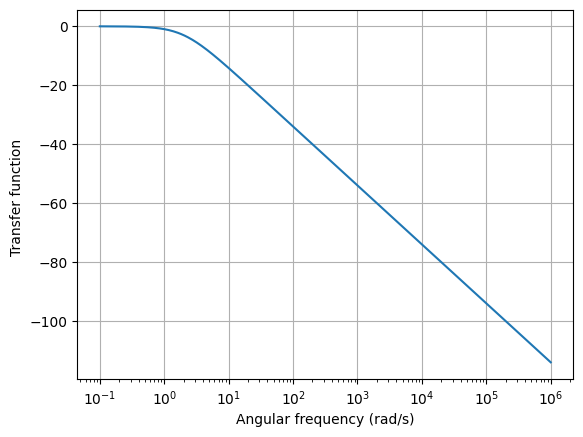

In [3]:
H(jw).dB.plot((0, 1000000), log_frequency=True)
from matplotlib.pyplot import show
show()

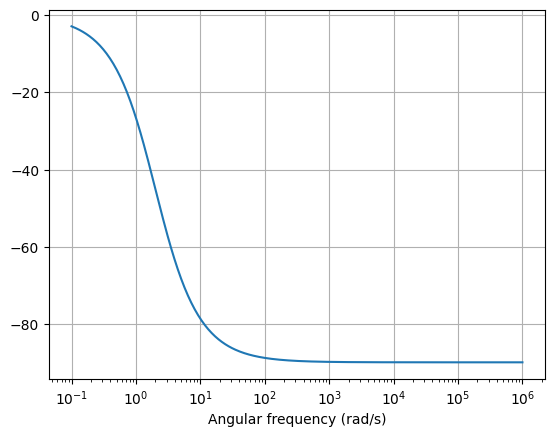

In [4]:
H(jw).phase_degrees.plot((0, 1000000), log_frequency=True)
show()

Recordeu que deiem que si coneixem la funció de transferència coneixem la resposta a qualsevol entrada? 

Anem a veure un exemple. Considerem una entrada sinosoidal de freqüència 3 rad/s que comença a t=0:

In [5]:
v_i = voltage(sin(3 * t) * u(t))

Calculem la seva transformada de Laplace:

In [6]:
V_i = v_i(s)
V_i

  3   
──────
 2    
s  + 9

Multiplicant per la funció de transferència trobem el senyal de sortida:

In [7]:
V_o = V_i * H
V_o

       3        
────────────────
⎛s    ⎞ ⎛ 2    ⎞
⎜─ + 1⎟⋅⎝s  + 9⎠
⎝2    ⎠         

Fem la transformada inversa de Laplace per obtenir el senyal en el domini del temps:

In [8]:
v_o = V_o(t)
v_o

  ⎛                                                   -2⋅t⎞     
  ⎜4⋅sin(3⋅t)   2⋅cos(3⋅t)   2⋅(-2 - 3⋅ⅉ)⋅(-2 + 3⋅ⅉ)⋅ℯ    ⎟     
3⋅⎜────────── - ────────── + ─────────────────────────────⎟⋅u(t)
  ⎝    39           13                    169             ⎠     

Simplifiquem una mica l'expressió:

In [9]:
v_o.simplify_terms()

  ⎛   2⋅t               2⋅t             ⎞  -2⋅t     
2⋅⎝2⋅ℯ   ⋅sin(3⋅t) - 3⋅ℯ   ⋅cos(3⋅t) + 3⎠⋅ℯ    ⋅u(t)
────────────────────────────────────────────────────
                         13                         

In [10]:
v_o.simplify_sin_cos(as_sin=True)

         ⎛      π            ⎞                    
2⋅√13⋅sin⎜3⋅t - ─ + atan(2/3)⎟⋅u(t)      -2⋅t     
         ⎝      2            ⎠        6⋅ℯ    ⋅u(t)
─────────────────────────────────── + ────────────
                 13                        13     

El primer terme és la resposta a l'estat estacionari, el segon terme la resposta transitòria al connectar l'entrada sinosoidal a t=0.

Fixeu-vos que la resposta estacionària té la mateixa freqüència que el senyal d'entrada, però està desfasat.

Anem a representar els senyals:

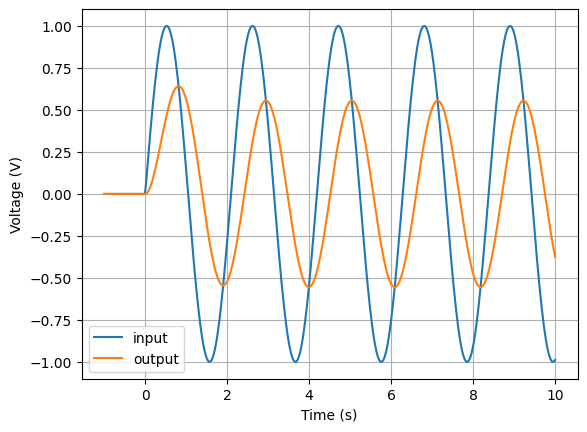

In [11]:
ax = v_i.plot((-1, 10), label='input')
ax = v_o.plot((-1, 10), axes=ax, label='output')
ax.legend()
show()

Fixeu-vos en l'efecte del transitori al principi, fins que la resposta tendeix cap a la resposta estacionària

## Estabilitat del sistema

Un sistema és estable si la seva resposta a un imils tendeix a zero per un temps infinit.

S'utilitzen diversos mètodes per determinar l'estabilitat d'un sistema: mètode de Ruth, diagrama de Bode, criteri de Lyapunov.

La transformada de Laplace ens permet escriure la funció de transferència com a:

$\huge H(s)=\prod_{i=1}^N \frac{1}{s-s_{P_i}}$

on $s_{P_i}$ són les arrels del polinomi característic i seran els pols de la funció de transferència. Perquè un sistema sigui estable, la seva funció de transferència no pot tenir pols amb parts reals positives. Si la funció de transferència és estrictament estable, les parts reals de tots els pols seran negatives i el comportament transitori tendirà a zero en el límit del temps infinit.


In [12]:
H.poles()

Cal interpretar el resultat. Ens diu que hi ha un pol a $s=-2$ amb multiplicitat 1 (es a dir, que no es repeteix).

Al nostre circuit tenim un pol per $s = -2 < 0$. Serà un sistema estable.

### Anàlisi del diagrama de Bode

Cada pol de la funció de transferència  produeix una caiguda de 20db/dècada en el guany, i de 45°/dècada en la fase. Amb aquesta i altres regles d'or podem garantir l'estabilitat del sistema. {cite}`Cómo_utilizar_diagrama_de_Bode_para_estabilidad`.
